# Workplace interaction

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import some plotting libraries and set some defaults:

In [9]:
import sys
import numpy as np
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

import random
random_seed = 5

sys.path.append('..')
from global_params import load_params

> **Tip:**  
> Producing figures in svg format (scalable vector graphics) makes for sharp plots on webpages. However, if you make plots with thousands of observations you should set this to `'png'` instead:

In [10]:
%config InlineBackend.figure_formats = ['svg'] 

> **Tip:**  
> Some values apply globally to your analysis. E.g., sample sizes, cutoffs, names, rates, etc. Keeping those in a a yml file like `interaction_params.yml` and loading them in each notebook avoids the risk of manually adding/updating them in each notebook where they are used. You can use the `load_globals` function imported above from `global_params.py` to produce an object holding all the global values:

In [11]:
params = load_params('../global_params.yml')
params

{'sample_size': 24}

In [12]:
params.sample_size

24

## Sampling

In [13]:
subjects = pd.read_csv('../data/data_table.csv')
assert subjects.index.size == params.sample_size

> **Tip:**  
> By adding a label and caption to a cell displaying a table, you can refer to that table elsewhere and insert it in a manuscript.

In [14]:
#| label: tbl-subjects
#| tbl-cap: "People included in the analysis."
subjects

,name,age,sex,position,nationality
0,Julie,27,F,PhDstudent,DK
1,Thomas,33,M,Postdoc,GB
2,Emilie,23,F,PhDstudent,CH
3,Sofie,31,F,Postdoc,DK
4,Sara,29,F,Postdoc,US
5,Cecilie,34,F,Postdoc,DK
6,Anders,32,M,PhDstudent,UK
7,Emma,42,F,Professor,DK
8,Caroline,31,F,PhDstudent,DK
9,Laura,30,F,Postdoc,DK


> **Tip:**  
> By generaing markdown for descriptions that will eventually end up in the manuscript, you can imbed python values. It also ensures that the manuscript exactly reflects the notebook.

In [15]:
#| echo: false
#| label: doc-sampling
Markdown(f"""

The {params.sample_size} subjects from workplaces in Denmark were interviewed .... blah blah 
blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah 
blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah 
""")



The 24 subjects from workplaces in Denmark were interviewed .... blah blah 
blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah 
blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah 


## Interviews

In [16]:
#| echo: false
#| label: doc-interviews
Markdown(f"""

The {params.sample_size} subjects were asked to score the follow statements:

{
''.join([
f'''{i+1}. {q}
''' 
for i, q in enumerate(params.questions)])
}
""")

AttributeError: 'Params' object has no attribute 'questions'

In interviewed `{python} params.sample_size` workplace individuals were interviewed by .... blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, 
blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, blah, 

In [31]:

#| label: tbl-measured-informality
#| tbl-cap: "Informality quantified for subjects in the study."

df = pd.DataFrame({'name': subjects.name, 
                   'seniority': np.random.randint(0, 5, params.sample_size), 
                   'age': subjects.age})
df['informality'] = np.random.normal(loc=10, scale=1, size=params.sample_size)
df

,name,seniority,age,informality
0,Julie,3,27,9.351339
1,Thomas,0,33,10.989881
2,Emilie,4,23,8.383734
3,Sofie,2,31,7.349484
4,Sara,4,29,10.642044
5,Cecilie,1,34,9.069120
6,Anders,1,32,8.972459
7,Emma,0,42,10.527649
8,Caroline,3,31,10.841845
9,Laura,4,30,10.774139


In [ ]:
#| label: tbl-mean-informality
#| tbl-cap: "Mean interaction scores by seniority and age"
df.groupby(['seniority']).mean(numeric_only=True).reset_index()

,seniority,age,informality
0,0,35.200000,10.435058
1,1,33.000000,9.020789
2,2,30.333333,8.743199
3,3,33.666667,9.919283
4,4,34.250000,10.191871


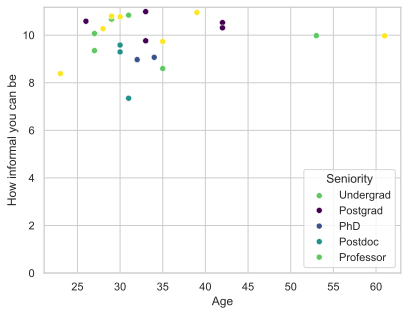

In [33]:
#| label: fig-danish-interaction
#| fig-cap: "Interaction among Danes: How Danes interact is has very little to do with age and seniority, compared to most other contries."

sns.scatterplot(x='age', y='informality', data=df, hue='seniority', palette='viridis')
plt.ylabel('How informal you can be')
plt.xlabel('Age')
plt.legend(title='Seniority', loc='lower right', labels=['Undergrad', 'Postgrad', 'PhD', 'Postdoc', 'Professor'])
plt.ylim(bottom=0) ;

Seems Danish people act very informally unaffected by age and seniority.

In [34]:
informality_age_cor = df.informality.corr(df.age)
informality_age_cor

0.11331363182555239

In [35]:
informality_seniority_cor = df.informality.corr(df.seniority)
informality_seniority_cor

0.03700382395304842

In [36]:
#| echo: false
#| label: doc-formality-correlation
Markdown(f"""
         
The correlation between informality and age was {round(informality_age_cor, 3)} and the correlation 
between informality and seniority was {round(informality_seniority_cor, 3)}.

""")



The correlation between informality and age was 0.113 and the correlation 
between informality and seniority was 0.037.



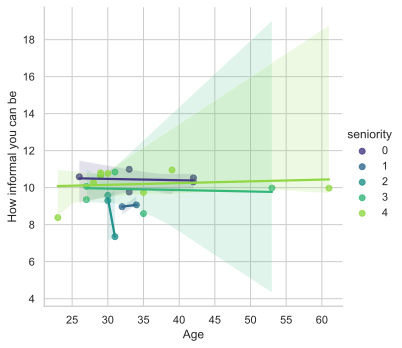

In [37]:
#| label: fig-danish-interaction-regressions
#| fig-cap: "Interaction among Danes: Regressions of informality against age for five levels of seniority."

sns.lmplot(x='age', y='informality', data=df, hue='seniority', palette='viridis')
plt.ylabel('How informal you can be')
plt.xlabel('Age') ;